<a href="https://colab.research.google.com/github/SaraLatif99/Modern-Deep-Convoluntional-Neural-Networks-with-PyTorch/blob/master/LinearClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Linear Classifier for Dataset " CIFAR10 " 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np


In [28]:
#Defining Transformation that will apply to all our images

transform = transforms.Compose([
                                
                                transforms.ToTensor(), #First transformation from NumpyArray to Tensors
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) # second transformation is normalization
])

trainset = torchvision.datasets.CIFAR10(root='../data',train=True, download=True,transform=transform) # loaading dataset and applying transformation
testset = torchvision.datasets.CIFAR10(root='../data',train=False, transform=transform)

trainloader =torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers = 2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
'deer', 'dog','frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


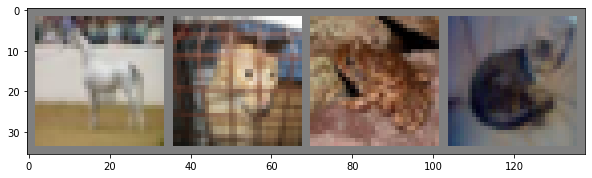

horse   cat  frog   cat


In [29]:
def imshow(img):
  plt.figure(figsize = (10,10))
  img = img/ 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0) ))
  plt.show()

#get some random images
dataiter =  iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))

#print labels
print(' '.join('%5s' %classes[labels[j]] for j in range(4)))


In [0]:
 #Linear Classifier
 class LinearClassifier(nn.Module):
   def __init__(self,n_input_neurons,n_output_neurons):
     super().__init__()
     self.linear = nn.Linear(n_input_neurons,n_output_neurons)

    #we have to define forward pass only, no backward pass, because pyTorch will automatically do it for us
   def forward(self,x):
     # x has shape [batch_size, 3, height, width]
      batch_size = x.shape[0]
      x = x.view(batch_size, -1)  # it is equivalent of reshape in numpy, parameters mean that first dimension is batch_size and second is 3,height,width
      return self.linear(x)
     

In [0]:
height, width = images.shape[2:]

In [32]:
height, width

(32, 32)

In [0]:
net = LinearClassifier(n_input_neurons=3*height*width , n_output_neurons=10).cuda()

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.001)

In [35]:
for epoch in range(5): #loop over the dataset multiple times

  running_loss = 0.0
  for i,data in enumerate(trainloader,0):
    images, labels =data
    images, labels = images.cuda(), labels.cuda()

    #gradients to zero
    optimizer.zero_grad()

    #forward pass + loss

    output = net(images)
    loss = criterion(output, labels)



    loss.backward()
    optimizer.step()

    #print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %
            (epoch + 1 , i + 1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.345
[1,  4000] loss: 2.323
[1,  6000] loss: 2.332
[1,  8000] loss: 2.323
[1, 10000] loss: 2.334
[1, 12000] loss: 2.335
[2,  2000] loss: 2.239
[2,  4000] loss: 2.297
[2,  6000] loss: 2.295
[2,  8000] loss: 2.277
[2, 10000] loss: 2.281
[2, 12000] loss: 2.300
[3,  2000] loss: 2.200
[3,  4000] loss: 2.275
[3,  6000] loss: 2.276
[3,  8000] loss: 2.268
[3, 10000] loss: 2.299
[3, 12000] loss: 2.281
[4,  2000] loss: 2.219
[4,  4000] loss: 2.222
[4,  6000] loss: 2.250
[4,  8000] loss: 2.273
[4, 10000] loss: 2.290
[4, 12000] loss: 2.290
[5,  2000] loss: 2.203
[5,  4000] loss: 2.232
[5,  6000] loss: 2.257
[5,  8000] loss: 2.216
[5, 10000] loss: 2.276
[5, 12000] loss: 2.251
Finished Training


In [0]:
def get_quality(net):
  correct = 0
  total = 0
  with torch.no_grad():
    for data in testloader:
      images,labels = data
      images,labels = images.cuda(), labels.cuda()
      output = net(images)
      _, predicted = torch.max(output.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  print('Accuracy of the network on test images : %d %%' %(100 * correct/total))

In [37]:
get_quality(net)

Accuracy of the network on test images : 33 %
